# 💻Laptop Price Predictions

# 🧠Problem Statement


💻Laptops have become essential in today’s world, but determining a fair price for them can be challenging due to the wide variety of models and specifications. This project aims to use machine learning, specifically linear regression, to predict laptop prices based on various features such as brand, processor type, RAM, storage capacity, and other specifications. The dataset contains 19 columns, including the target variable (price). The process involves understanding the data, performing exploratory data analysis, handling outliers, encoding categorical variables, and splitting the dataset for training and testing. The ultimate goal is to build a predictive model that can help consumers make informed purchasing decisions and assist companies in pricing their products competitively.

<a id='import'></a>

# Importing libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


## Load Dataset

In [2]:
laptops = pd.read_csv("laptopPrice.csv")

# Initial Data Exploration

In [3]:
laptops.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [5]:
laptops.tail()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
818,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars,0,0
819,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars,0,0
820,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0
821,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars,0,0
822,Lenovo,AMD,Ryzen 5,10th,8 GB,DDR4,512 GB,0 GB,DOS,64-bit,0 GB,ThinNlight,No warranty,No,No,57490,4 stars,18,4


In [4]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [5]:
laptops.describe()

,Price,Number of Ratings,Number of Reviews
count,823.000000,823.000000,823.000000
mean,76745.177400,315.301337,37.609964
std,45101.790525,1047.382654,121.728017
min,16990.000000,0.000000,0.000000
25%,46095.000000,0.000000,0.000000
50%,64990.000000,17.000000,2.000000
75%,89636.000000,139.500000,18.000000
max,441990.000000,15279.000000,1947.000000


**Observations:**
- Dataset has 823 rows and 19 columns.
- All values are non-null. 
- Data type of most of the columns is object.
- Price, number of ratings and number of reviews are in integers. 
- There are outliers in all 3 numerical columns.

<a id='outliers'></a>

# Removing Outliers

Outliers can skew statistical measures and affect the performance of models trained on the data, leading to inaccurate predictions.

Let's start with removing them.

* For each column, we first compute the Z-score of each value in the column, relative to the column mean and standard deviation.
* Then, we take the absolute Z-score because the direction does not matter, only if it is below the threshold.
* `( < 3).all(axis=1)` checks if, for each row, all column values are within 3 standard deviations from the mean
* Finally, the result of this condition is used to index the dataframe.

In [6]:
# select numerical columns
numerical_columns = ['Price', 'Number of Ratings', 'Number of Reviews']

# remove outliers 
laptops = laptops[(np.abs(stats.zscore(laptops[numerical_columns])) < 3).all(axis=1)]

In [7]:
print("After removing outliers, our dataset has {} rows.".format(laptops.shape[0]))

After removing outliers, our dataset has 785 rows.


<a id='eda'></a>

# Exploratory Data Analysis

## Distributions and correlation across all numerical columns.

<Figure size 640x480 with 0 Axes>

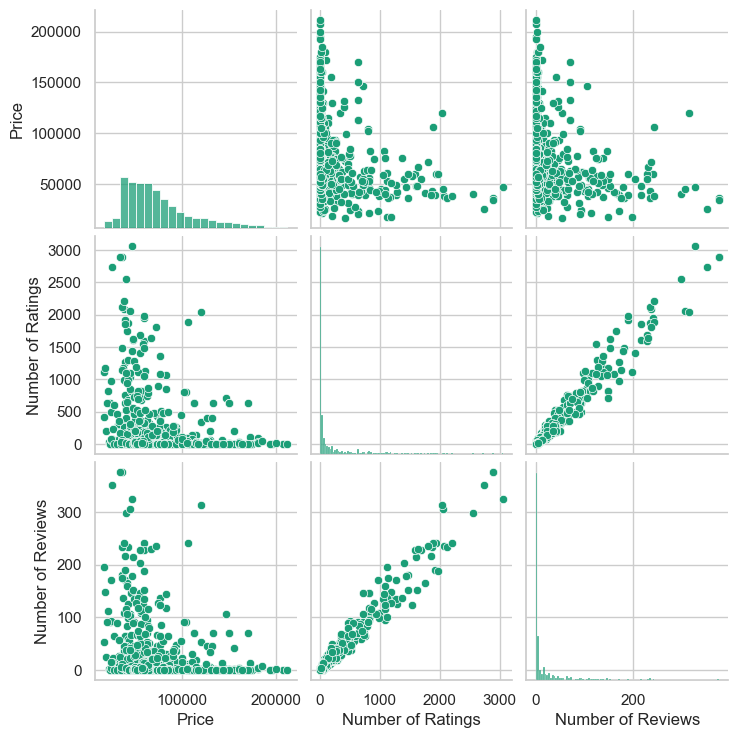

In [8]:
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette("Dark2")
sns.despine()

sns.pairplot(laptops);

Visually, the highest correlation is between Number of Ratings and Number of Reviews.

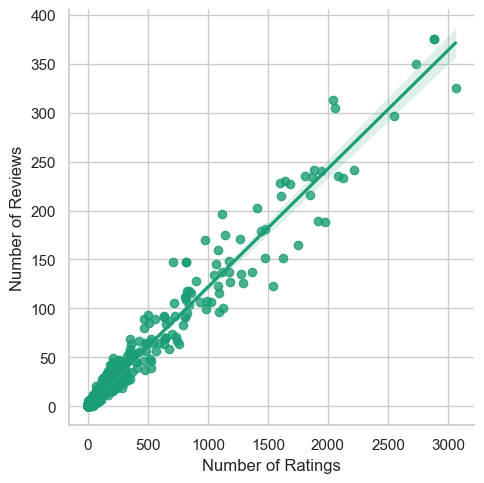

In [9]:
# Regression line for correlated columns
sns.lmplot(x='Number of Ratings',y='Number of Reviews',data=laptops);

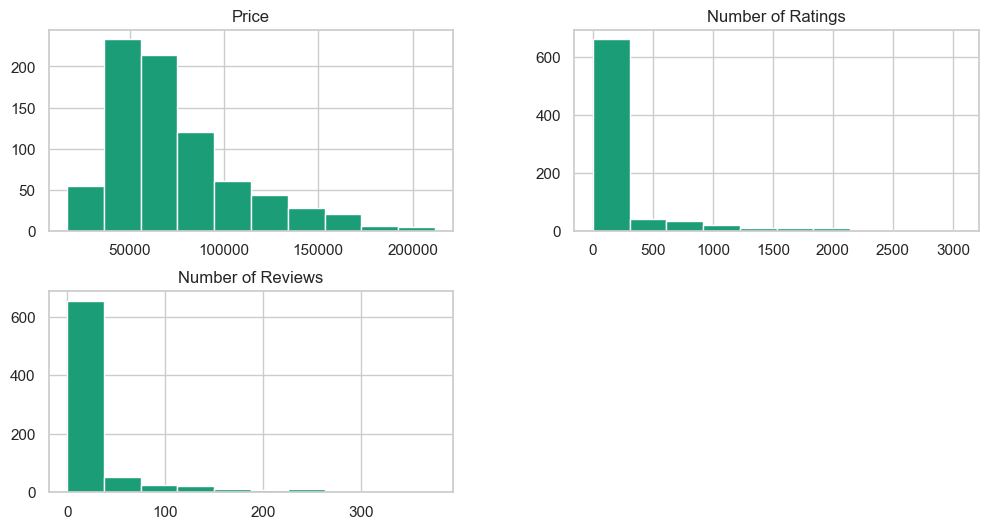

In [11]:
# Distribution of numerical columns
laptops[numerical_columns].hist(figsize=(12, 6));

**Observations from the plots:**
- There is a strong positive correlation between number of ratings and number of reviews.
- And there is some weak negative correlation between price and numbers of ratings and reviews, where we can see that expensive laptops tend to get very few or zero reviews (and ratings).
- Distributions of all of our numeric variables are right-skewed.


## Univariate and Bivariate Analysis 

### Brands

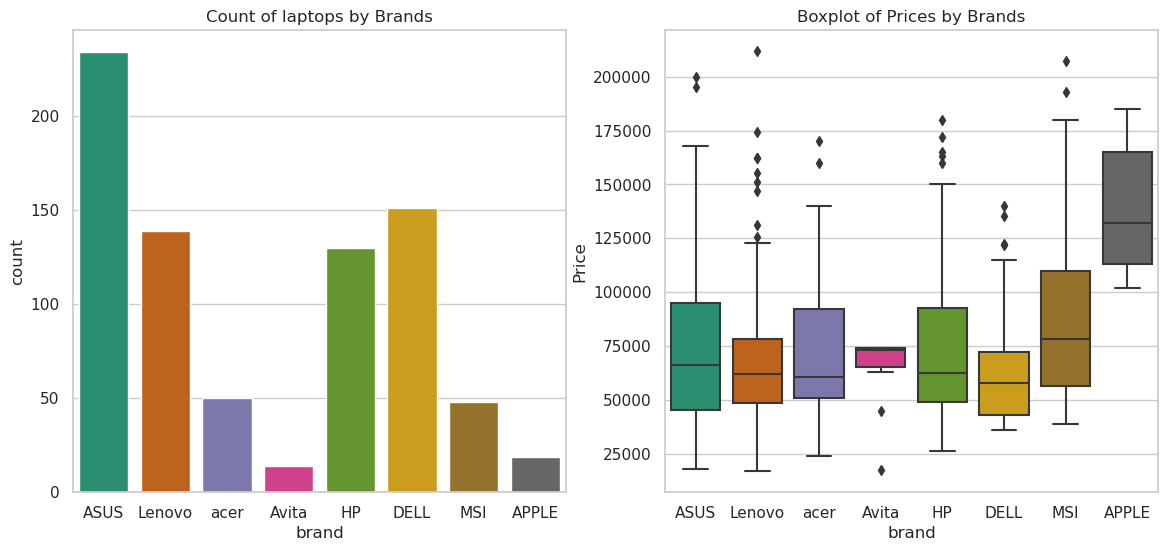

In [11]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=laptops.brand)
axes[0].set_title("Count of laptops by Brands")

sns.boxplot(ax=axes[1], x=laptops.brand, y=laptops.Price)
axes[1].set_title("Boxplot of Prices by Brands");

### Processor Brands

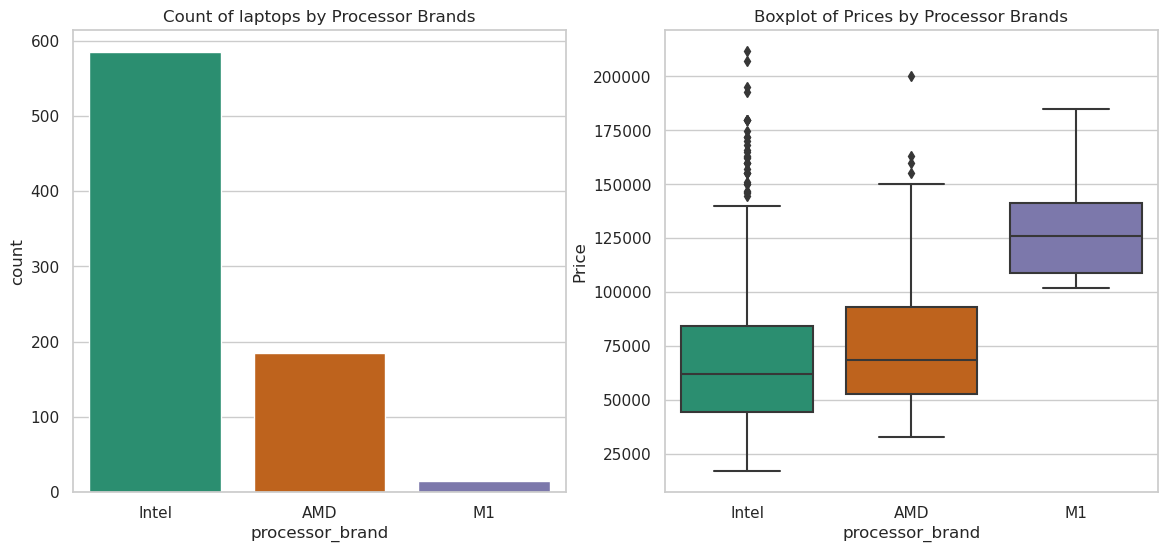

In [12]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=laptops.processor_brand)
axes[0].set_title("Count of laptops by Processor Brands")

sns.boxplot(ax=axes[1], x=laptops.processor_brand, y=laptops.Price)
axes[1].set_title("Boxplot of Prices by Processor Brands");

### Processor Names

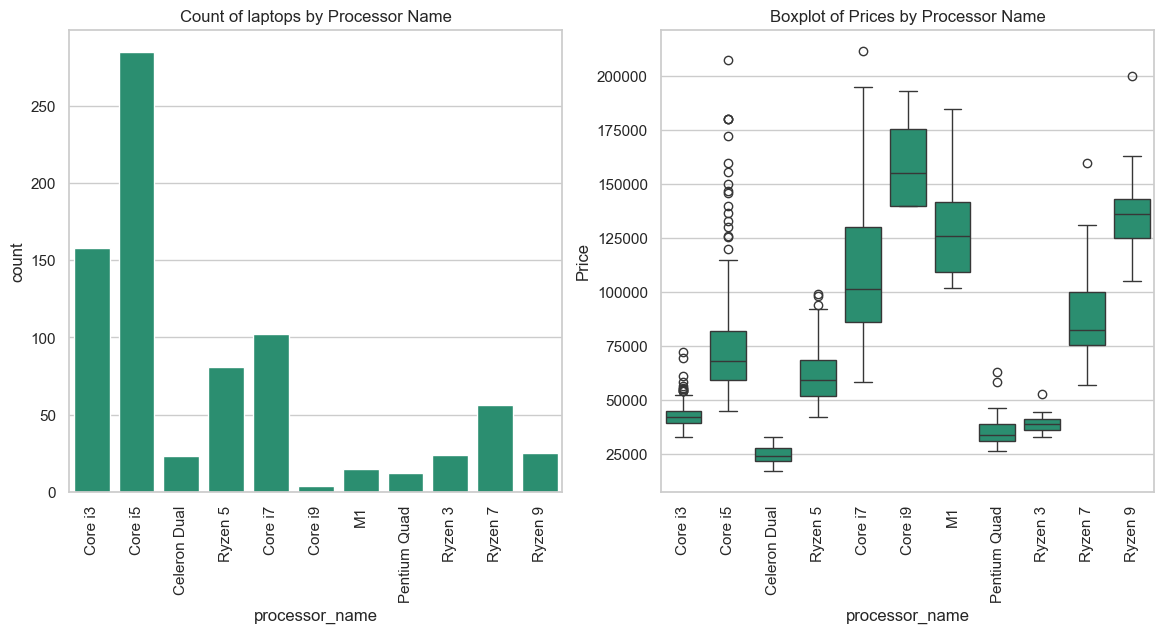

In [13]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=laptops.processor_name)
axes[0].set_title("Count of laptops by Processor Name")
axes[0].tick_params(axis='x', rotation=90)

sns.boxplot(ax=axes[1], x=laptops.processor_name, y=laptops.Price)
axes[1].set_title("Boxplot of Prices by Processor Name")
axes[1].tick_params(axis='x', rotation=90);

### Processor Generations

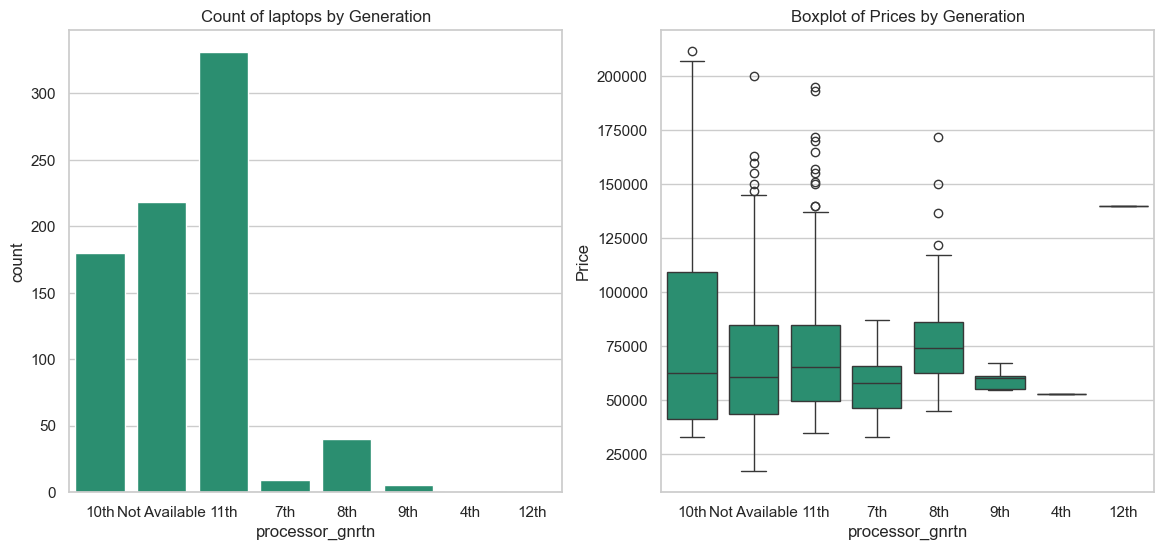

In [15]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=laptops.processor_gnrtn)
axes[0].set_title("Count of laptops by Generation")

sns.boxplot(ax=axes[1], x=laptops.processor_gnrtn, y=laptops.Price)
axes[1].set_title("Boxplot of Prices by Generation");

### Ram GB

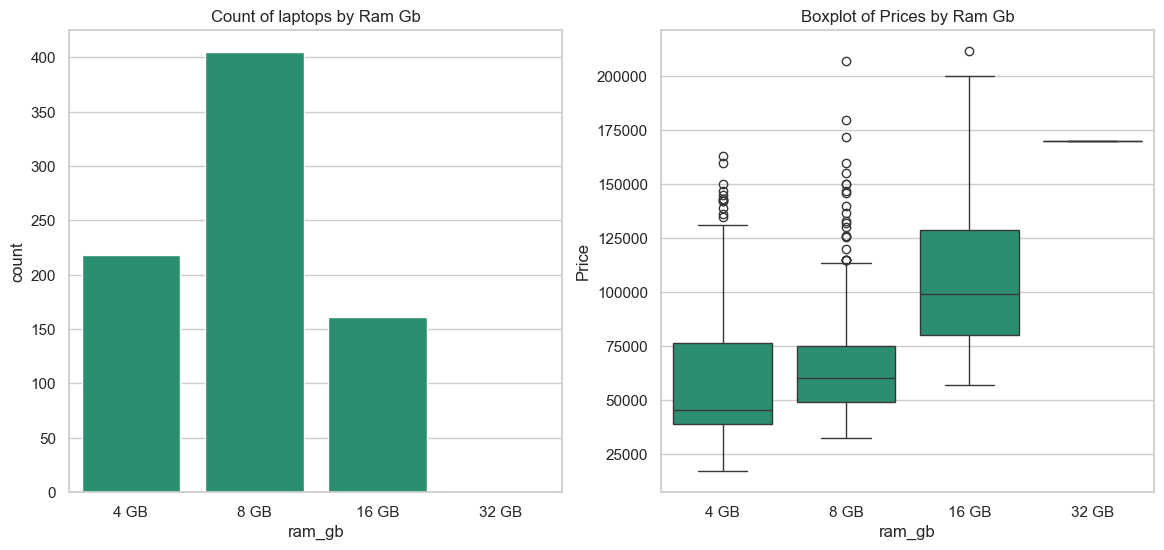

In [16]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=laptops.ram_gb)
axes[0].set_title("Count of laptops by Ram Gb")

sns.boxplot(ax=axes[1], x=laptops.ram_gb, y=laptops.Price)
axes[1].set_title("Boxplot of Prices by Ram Gb");

### Solid State Drive (SSD)

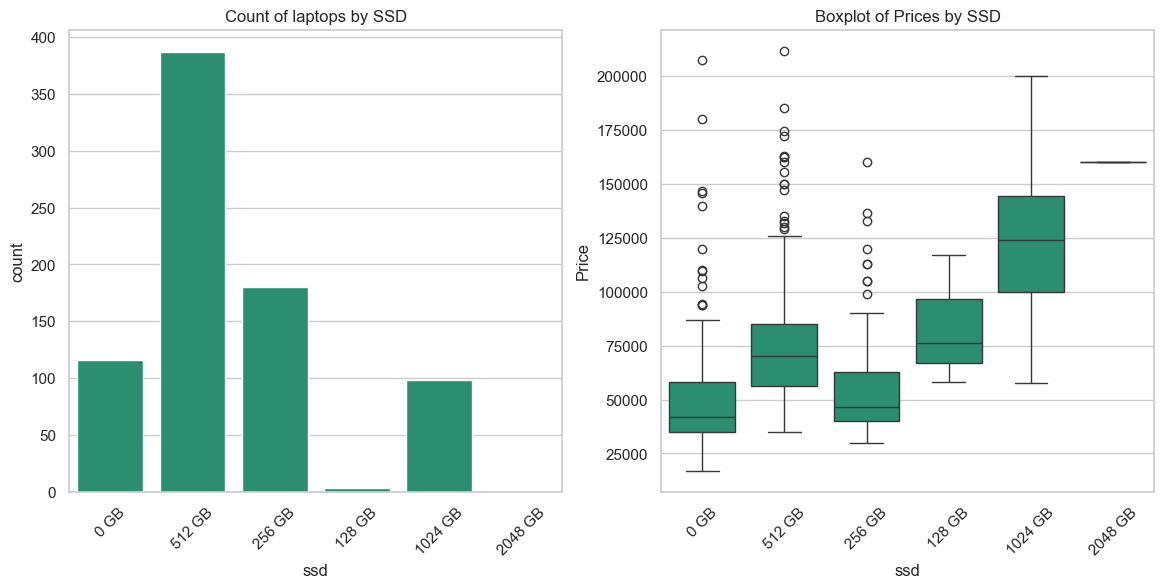

In [17]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=laptops.ssd)
axes[0].set_title("Count of laptops by SSD")
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(ax=axes[1], x=laptops.ssd, y=laptops.Price)
axes[1].set_title("Boxplot of Prices by SSD")
axes[1].tick_params(axis='x', rotation=45);

### Operating Systems

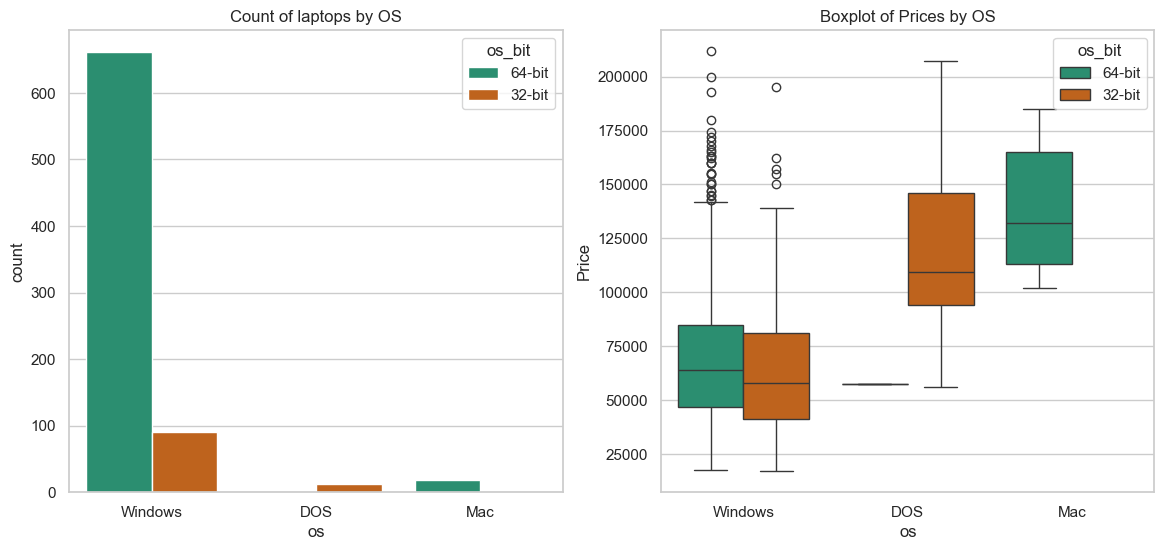

In [18]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=laptops.os, hue=laptops.os_bit)
axes[0].set_title("Count of laptops by OS")

sns.boxplot(ax=axes[1], x=laptops.os, y=laptops.Price, hue=laptops.os_bit)
axes[1].set_title("Boxplot of Prices by OS");

### Touchscreen

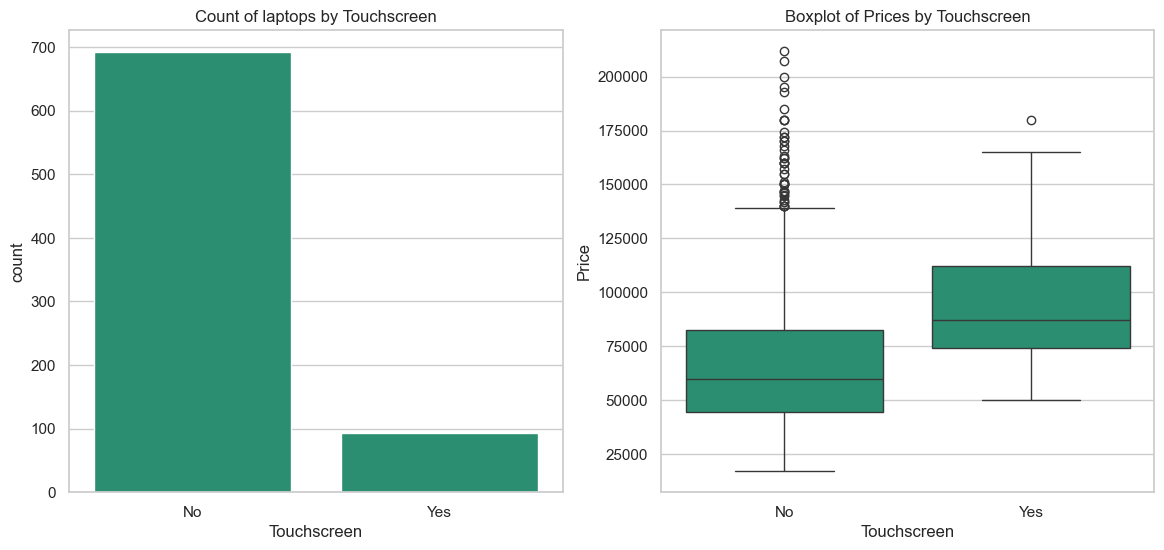

In [19]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=laptops.Touchscreen)
axes[0].set_title("Count of laptops by Touchscreen")

sns.boxplot(ax=axes[1], x=laptops.Touchscreen, y=laptops.Price)
axes[1].set_title("Boxplot of Prices by Touchscreen");

**Observations from the plots above:**
- ASUS is represented the most in our dataset, while APPLE seems to be the most expensive.
- Most of the laptops have processor Intel, while M1 is the most expensive on average.
- Core i9 is the latest and the fastest Intel processor and it is the most expensive, but most laptops represented in our dataset have Core i5 and Core i3.
- Processor Generation column has a lot of "Not Available" values. But from available ones we can see that 10th and 11th are the most popular generations here in this dataset and they don't seem to be correlated with prices.
- 8 GB is the standard amount of RAM for an average laptop and we see it's the most popular one. Another observation is that more gigabytes of RAM correlate with higher prices. 32 GB Ram is the most expensive and the least used for now.
- Most laptops have 512 GB, which is enough for business use and simple gaming. Although, capacity of SSD seems to be correlated with prices, note there is a weird behaviour in laptops with 128 GB SSD (they seem to be more expensive than laptops with higher SSD). But such laptops are very rare in our dataset.
- Windows is definetely the most popular operating system and on average it's the most affordable too.
- 7 out 8 laptops don't have touchscreen.


## Exploring high prices of laptops with low SSD.

Let's look at rows with 128 GB SSD to see why these laptops tend to be expensive.

In [20]:
laptops[laptops['ssd'] == '128 GB']

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
205,HP,Intel,Core i5,8th,8 GB,DDR4,128 GB,0 GB,Windows,64-bit,0 GB,ThinNlight,1 year,No,No,76012,4 stars,129,16
578,HP,Intel,Core i7,8th,16 GB,DDR4,128 GB,1024 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,116941,3 stars,0,0
624,ASUS,Intel,Pentium Quad,Not Available,4 GB,DDR4,128 GB,0 GB,Windows,32-bit,0 GB,Casual,No warranty,Yes,No,58100,3 stars,0,0


There are only 3 laptops with such SSD. They have very different prices, but RAM and processor seem to be correlated with them. So, let's keep these rows.


## Exploring "processor generation" column.

In [21]:
laptops['processor_gnrtn'].value_counts(normalize=True)

processor_gnrtn
11th             0.421656
Not Available    0.277707
10th             0.229299
8th              0.050955
7th              0.011465
9th              0.006369
4th              0.001274
12th             0.001274
Name: proportion, dtype: float64

More than 27% of processor generations are not available.

In [22]:
# value count of processor brands of laptops with missing processor generation
laptops[laptops['processor_gnrtn'] == "Not Available"]['processor_brand'].value_counts()

processor_brand
AMD      181
Intel     37
Name: count, dtype: int64

In [23]:
# value count of processor brands of all laptops to compare
laptops['processor_brand'].value_counts()

processor_brand
Intel    585
AMD      185
M1        15
Name: count, dtype: int64

We can see that almost all AMD laptops do not have available generation name, and only few Intel laptops have it missing. Replacing not available values with the most frequent value will not work here. If we drop rows or the whole column, we might miss some important information. It looks like the best course of action is to leave the values as they are.

<a id='prepr'></a>

# Data Preprocessing

Now that we've explored the data, let's deal with categorical data and then split the data into training and testing sets.


## Feature Encoding for Categorical Variables

One of the ways to convert categorical variables into dummy/indicator variables is to use pandas function `pd.get_dummies()`. It returns a DataFrame where each categorical variable is replaced by a set of binary columns indicating the presence or absence of the categorical value.

In [25]:
# Identify categorical variables by selecting columns with data type 'object'
categorical_variables = laptops.columns[laptops.dtypes == 'object']

# Convert categorical variables into dummy variables, dropping the first level for each variable
laptops = pd.get_dummies(laptops, columns=categorical_variables, drop_first=True)

laptops.head()

,Price,Number of Ratings,Number of Reviews,brand_ASUS,brand_Avita,brand_DELL,brand_HP,brand_Lenovo,brand_MSI,brand_acer,...,weight_ThinNlight,warranty_2 years,warranty_3 years,warranty_No warranty,Touchscreen_Yes,msoffice_Yes,rating_2 stars,rating_3 stars,rating_4 stars,rating_5 stars
0,34649,3,0,True,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
1,38999,65,5,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,True,False,False
2,39999,8,1,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,True,False,False
3,69990,0,0,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
4,26990,0,0,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False


In [26]:
print("After feature encoding, our dataset has {} columns.".format(laptops.shape[1]))

After feature encoding, our dataset has 63 columns.


## Train / Test Split 

**Set a variable `X` equal to all the numerical features of the laptops and a variable `y` equal to the "Price" column which we want to predict.**

In [27]:
X = laptops.loc[:, laptops.columns != "Price"]

In [28]:
y = laptops['Price']

**Split the data into training and testing sets.**

The `train_test_split` function is commonly used in machine learning to split a dataset into two subsets: one for training a model and another for testing its performance. 

Purpose:
- **Model Training**: The training dataset is used to fit the machine learning model, allowing it to learn the patterns and relationships within the data.
- **Model Evaluation**: The testing dataset is used to evaluate the performance of the trained model on unseen data, providing an estimate of how well the model generalizes to new observations.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

<a id='lr'></a>

# Linear Regression Model

Now its time to train our model on our training data!

In [41]:
# Create an instance of Linear Regression
lm = LinearRegression()

# Fit linear regression model on the training data
lm.fit(X=X_train, y=y_train)

LinearRegression()

## Predictions on Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

In [42]:
predictions = lm.predict(X_test)

**Create a scatterplot of the real test values versus the predicted values.**

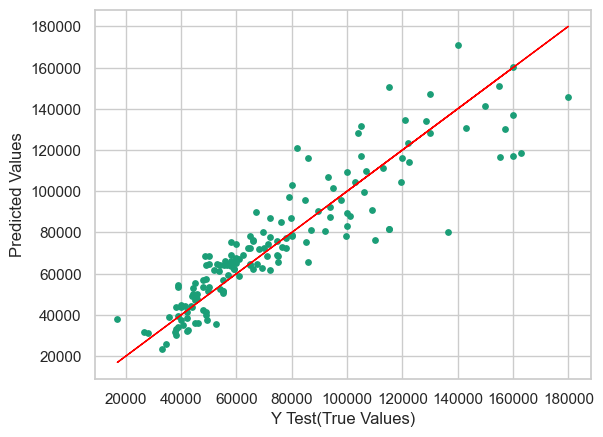

In [43]:
plt.scatter(y_test,predictions,s=15)
plt.xlabel('Y Test(True Values)')
plt.ylabel('Predicted Values')
plt.plot(y_test, y_test, color='red', lw=1)

plt.show()

### 🤖 Predictions

📉 After training the linear regression model, predictions were made on the test dataset to evaluate how well the model performs on unseen data. A scatter plot comparing actual vs. predicted prices was generated to visualize the accuracy of the predictions.

🔍 The points closely follow the diagonal line, indicating that the model's predictions are generally close to the actual prices. This suggests that the model has learned the underlying relationships in the data effectively and can make reliable predictions on new inputs.


## Evaluating Linear Regression Model

The R-squared (R2) score is commonly used for evaluating the performance of regression models. 

In [44]:
print("R^2 on training  data ",lm.score(X_train, y_train))
print("R^2 on testing data ",lm.score(X_test,y_test))

R^2 on training  data  0.8417403488829825
R^2 on testing data  0.8198671282982446


R-squared score of 0.81 on testing data means that approximately 81% of the variance in the dependent variable (the variable we are trying to predict) is explained by the independent variables (the predictors). In other words, it means that the model accounts for a large portion of the variability in the data and performs relatively well in explaining the relationship between the independent and dependent variables.

In [45]:
# Example pipeline: scaling + model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Define the parameter grid
param_grid = {
    'ridge__alpha': [0.01, 0.1, 1, 10, 100]
}

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score on Training Set:", grid_search.best_score_)

# Evaluate on test set
y_pred = grid_search.predict(X_test)
print("Test R² Score:", r2_score(y_test, y_pred))

Best Parameters: {'ridge__alpha': 10}
Best R² Score on Training Set: 0.7762116988935142
Test R² Score: 0.8077518266683896


# 📊🔍Model Test   🏆

In [50]:
pred_df = pd.DataFrame({'Actual Value': y_test,'Predicted Value': y_pred,'Difference': y_test - y_pred})
pred_df

,Actual Value,Predicted Value,Difference
782,159990,135419.740149,24570.259851
141,39990,45126.128218,-5136.128218
43,38940,33230.523337,5709.476663
102,41990,42750.802877,-760.802877
561,120980,133670.669620,-12690.669620
...,...,...,...
109,45650,47771.548967,-2121.548967
344,55990,68057.791923,-12067.791923
85,54238,53393.656517,844.343483
220,62300,68521.802534,-6221.802534


### ✅ Conclusion

📈 The linear regression model achieved an R-squared score of **0.80** on the test data. This indicates that the model explains approximately 81% of the variance in laptop prices based on the provided features.

🔍 The high R-squared value suggests that the model captures a significant portion of the underlying patterns in the data and performs well in predicting laptop prices.

🧰 This approach demonstrates the effectiveness of machine learning in deriving insights from product specifications and can be a valuable tool for both consumers and manufacturers.